In [20]:
# pip install ipython

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os

In [17]:
# 环境变量配置,运行一次即可
os.environ['PATH'] = os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

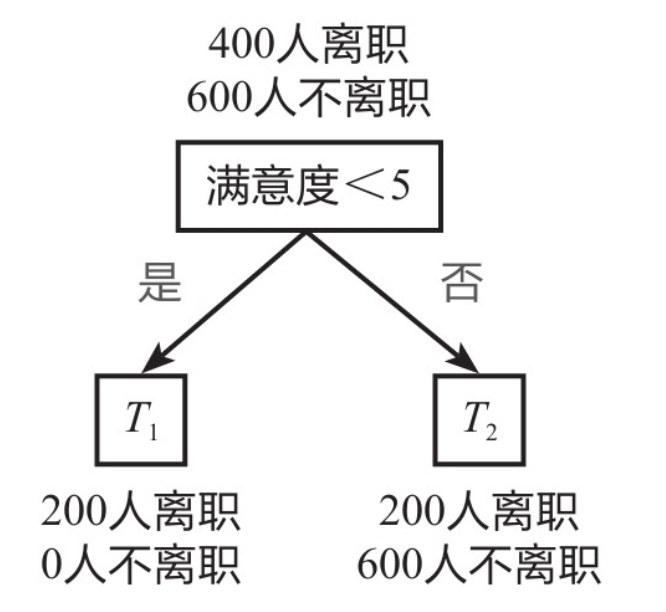

In [8]:
'''
Decision Tree (CART - gini)

Given entropy gini(T) = 1-sum(pi**2)
where pi is frequency of label i appears in sample set T.

After sperate T into T1、T2: 
gini(T) = [S1/(S1+S2)]*gini(T1)+[S2/(S1+S2)]*gini(T2)
where S1 = #|T1|, S2 = #|T2|.

以下图为例:
根节点1000个样本:
gini(根节点按满意度划分前) = 1-(0.4**2 + 0.6**2) = 0.48
gini(根节点按满意度划分后) = [200/(200+800)]*gini(T1)+[800/(200+800)]*gini(T2)
                  = [2/10]*(1-(1**2 + 0**2))+[8/10]*(1-(0.25**2 + 0.75**2))
                  = 0.3
                  
不难看出,按不同条件划分同一个节点,会得到不同的gini值,
因为T1、T2中的标签数量分配不同.
选择节点分类条件时要选entropy gini更小的(区分度更高,如1-(1**2+0**2)=0).
'''

Image(filename = "deciTree.png", width = 300, height = 300)

In [13]:
'''
Decision Tree (info_entropy)

entropy H(X) = - sum(pi*log(pi))
where X is random variables, like {离职,不离职}.

同样,分枝之后:
H(X)new = [S1/(S1+S2)]*H(X1)+[S2/(S1+S2)]*H(X2)

多一个步骤:计算分类后信息熵的减少值
Gain(new) = H(X)-H(X)new
该值自然越大越好.
'''
print()

In [25]:
'''
dicision tree can be used either
on regression or on classification problems
'''

# DecisionTree Classifier 尝试决策树分类
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 0, 0, 1, 1]

model = DecisionTreeClassifier(random_state=0)
model.fit(X, y)

print(model.predict([[5, 5], [7, 7], [9, 9]]))

[0 0 1]


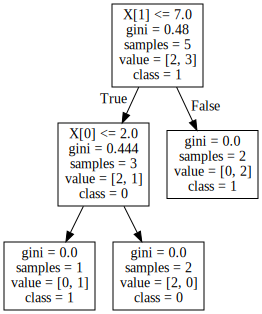

In [19]:
# 决策树可视化,需要下载安装包
# 教程: https://shimo.im/docs/Dcgw8H6WxgWrc8hq/read
# 环境变量: C:\Program Files (x86)\Graphviz2.38\

# X[i]为第i个特征; value = [#'0', #'1']

dot_data = export_graphviz(model, out_file=None, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph  # 通过graph.render('决策树可视化')可在代码所在文件夹生成决策树可视化PDF文件

In [29]:
'''
Q: random_state参数有什么用?

A: 虽然算法会尽量让gini在决策树模型中快速下降,
   但不保证不同的决策树一定会产生不同的gini。
   为了让程序每次运行时得到同样的决策树模型,
   需要给random_state赋值(任意整数值).
'''

# DecisionTree Regressor 尝试下决策树回归
# 回归决策树用的不是 gini, 也不是info_entropy, 
# 而是均方误差 MSE:= sum[(yi.real - yi.predict)**2] /n
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 2, 3, 4, 5]

reg_model = DecisionTreeRegressor(max_depth=2, random_state=0)
reg_model.fit(X, y)

print(reg_model.predict([[10,10],[25,64],[3,2]]))

[4.5 4.5 2. ]


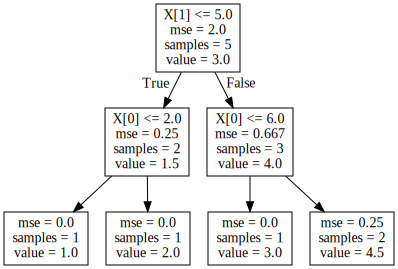

In [30]:
# 生成可视化结果
reg_dot_data = export_graphviz(reg_model, out_file=None)  # 回归决策树就没有class分类参数了
reg_graph = graphviz.Source(reg_dot_data)
reg_graph

In [32]:
'''
predict stuff turnover by DT model
'''

df_stuff = pd.read_excel('员工离职预测模型.xlsx')
df_stuff.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,低,3.8,0.53,2,157,3,1
1,中,8.0,0.86,5,262,6,1
2,中,1.1,0.88,7,272,4,1
3,低,7.2,0.87,5,223,5,1
4,低,3.7,0.52,2,159,3,1


In [33]:
'''
清洗数据
'''

df_stuff = df_stuff.replace({'工资': {'低': 0, '中': 1, '高': 2}})
df_stuff.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,0,3.8,0.53,2,157,3,1
1,1,8.0,0.86,5,262,6,1
2,1,1.1,0.88,7,272,4,1
3,0,7.2,0.87,5,223,5,1
4,0,3.7,0.52,2,159,3,1


In [40]:
'''
split features and label,
then do train_test split,
then fit model.
'''

X_stuff = df_stuff.drop(columns='离职') 
y_stuff = df_stuff['离职']

X_train, X_test, y_train, y_test = train_test_split(X_stuff, y_stuff,\
test_size=0.2, random_state=300)

turnover_model = DecisionTreeClassifier(max_depth=3, random_state=300)
turnover_model.fit(X_train, y_train)

# make prediction
y_pred = turnover_model.predict(X_test)
vec = pd.DataFrame()  # 创建一个空DataFrame 
vec['预测值'] = list(y_pred)
vec['实际值'] = list(y_test)
vec.head(10)

,预测值,实际值
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


In [43]:
'''
查看整体准确率,两种方法.
'''

# way1
wh_score = accuracy_score(y_pred, y_test)
print(wh_score)

# way2
turnover_model.score(X_test, y_test)

0.947


0.947

In [44]:
'''
与 logistic regression一样, DT同样可以查看标签概率.
'''

turnover_proba = turnover_model.predict_proba(X_test)
vec2 = pd.DataFrame(turnover_proba, columns=['不离职概率', '离职概率'])
vec2.head()

,不离职概率,离职概率
0,0.986904,0.013096
1,0.057692,0.942308
2,0.986904,0.013096
3,0.928168,0.071832
4,0.986904,0.013096


In [49]:
'''
模型预测效果
Recall ROC and KS value.
'''

# 1. Find fundamental parameters FPR and TPR.
fpr, tpr, thres = roc_curve(y_test, turnover_proba[:,1])
modelScore = pd.DataFrame()  # 创建一个空DataFrame 
modelScore['阈值'] = list(thres)
modelScore['假警报率'] = list(fpr)
modelScore['命中率'] = list(tpr)
modelScore

,阈值,假警报率,命中率
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.231672
2,0.942308,0.008628,0.664223
3,0.723061,0.040552,0.904692
4,0.071832,0.166091,0.944282
5,0.068627,0.175151,0.950147
6,0.039604,0.235116,0.958944
7,0.013096,1.000000,1.000000


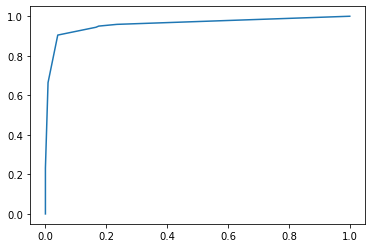

In [50]:
# 2. plot ROC curve.
plt.plot(fpr, tpr)
plt.show()

In [51]:
# 3. find out AUC (Area under ROC).
roc_score = roc_auc_score(y_test, turnover_proba[:,1])
print(roc_score)

0.9599706112307353


In [53]:
'''
Now evaluate importance of features.
'''

# 通过DataFrame进行展示，并根据重要性进行倒序排列
features = X_stuff.columns  # 获取特征名称
importances = turnover_model.feature_importances_  # 获取特征重要性

# 通过二维表格形式显示
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
1,满意度,0.595507
5,工龄,0.153035
3,工程数量,0.102322
2,考核得分,0.102115
4,月工时,0.047022
0,工资,0.000000


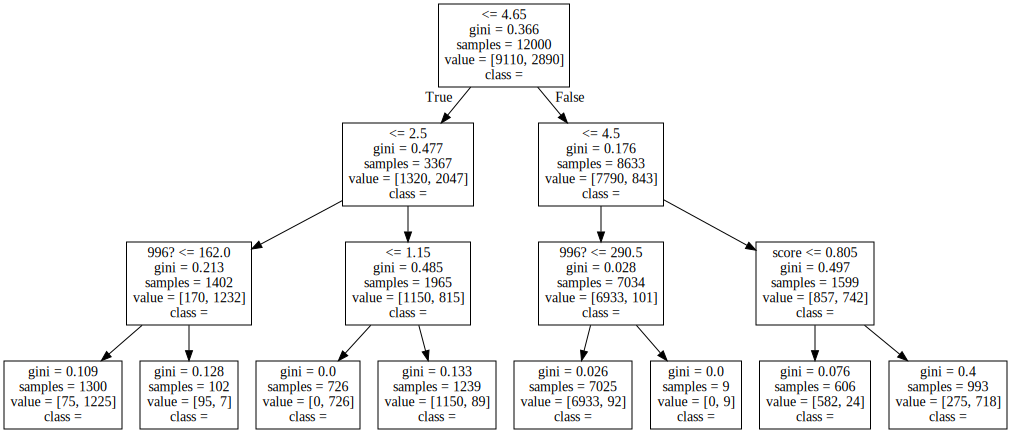

In [56]:
'''
DT Model Visualization
'''

turnover_tree = export_graphviz(turnover_model, out_file=None,\
feature_names=['工钱多伐', '领导中不', 'score', '搬多少砖', '996?', '被压榨多久'],\
class_names=['不辞', '辞职'])

turnover_DTModel_graph = graphviz.Source(turnover_tree)
turnover_DTModel_graph
# graph.render("result")  # 导出成PDF文件
# print('可视化文件result.pdf已经保存在代码所在文件夹！')